# **Exercise 1: Data Exploration and Preprocessing**

**1. Load and Explore the Data:**

In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
# Display the first 10 rows
print(df.head(10))
# Check for missing values
print(df.isnull().sum())
# Descriptive statistics
print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

**Task:**
Summarize the dataset

In [2]:
# Number of instances and features
print(f'Instances: {df.shape[0]}, Features: {df.shape[1]}')
# Missing values
print(df.isnull().sum())

Instances: 569, Features: 33
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

**2. Preprocessing:**

In [3]:
from sklearn.preprocessing import StandardScaler
# Drop irrelevant columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
# Convert diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Normalize features
scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)

Task:
Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

# **Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model**

**1. Implement a KNN Classifier:**

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predict the test set
y_pred = knn.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]


**2. Experiment with Different Values of n_neighbors:**

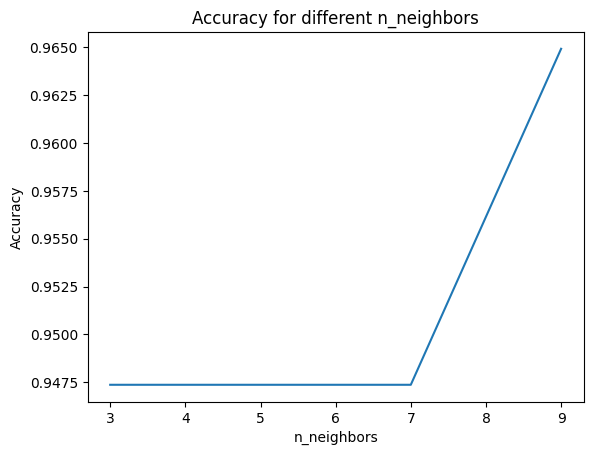

In [7]:
import matplotlib.pyplot as plt
neighbors = [3, 5, 7, 9]
accuracies = []
for n in neighbors:
    # The code within the for loop must be indented
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
# Plot
plt.plot(neighbors, accuracies)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for different n_neighbors')
plt.show()

# **Exercise 3: Implementing Logistic Regression**

**1. Implement a Logistic Regression Classifier:**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
# Predict test set
y_pred_lr = logreg.predict(X_test)
# Accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**2. Comparison of KNN and Logistic Regression:**

In [9]:
# prompt: Compare their accuracy, precision, and F1-score based on the classification report

# Compare KNN and Logistic Regression
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# You can further analyze the reports to compare accuracy, precision, and F1-score for each class (malignant and benign).


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



 The Logistic Regression model has a small edge in overall accuracy, while the precision and F1-scores are comparable between the two models, with Logistic Regression performing slightly better on class 1. However, the differences are not substantial, and both models demonstrate strong classification performance.

 Logistic Regression has a higher accuracy of 0.97 compared to KNN's 0.96 and also achieves a higher average F1-score of 0.97 versus KNN's average of 0.96.

 Logistic Regression appears to be the more appropriate choice for this classification problem, primarily due to its higher performance metrics, interpretability, and efficiency in both training and inference phases.

# **Exercise 4: Hyperparameter Tuning and Cross-Validation**

**1. Grid Search for Hyperparameter Tuning:**

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Best parameters and accuracy
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9648351648351647


**2. Cross-Validation for Logistic Regression:**

In [11]:
from sklearn.model_selection import cross_val_score
# k-fold cross-validation
cv_scores = cross_val_score(logreg, scaled_features, df['diagnosis'], cv=5)
print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.9806862288464524


The reported cross-validated accuracy for the Logistic Regression model is 0.9807 (rounded to four decimal places). This indicates that when the model is evaluated using cross-validation, it achieves an impressive accuracy of approximately 98.07%.

Logistic Regression Cross-Validated Accuracy: 0.9807

This high cross-validated accuracy suggests that the Logistic Regression model generalizes well to unseen data, making it a robust choice for this classification problem.

# **Exercise 5: Decision Boundary Visualization**

**1. Visualizing the Decision Boundary:**

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)
# KNN and Logistic regression with PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])
logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])

LogisticRegression(max_iter=10000)

Task: Plot

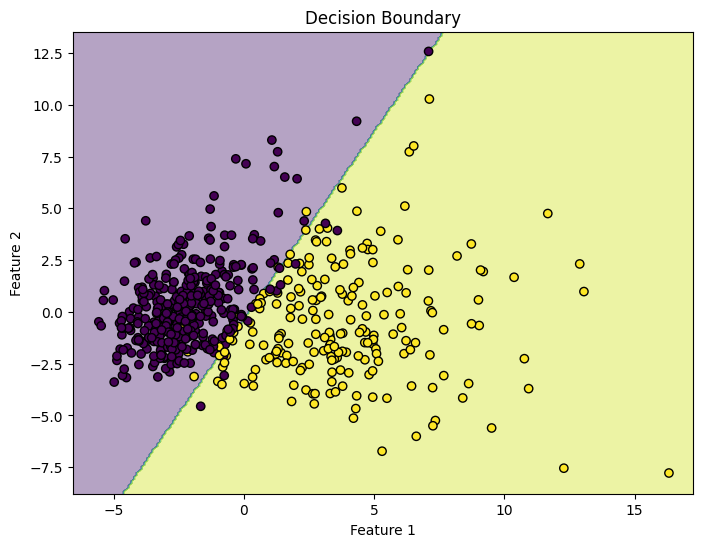

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming X_pca is the feature matrix and df['diagnosis'] are the class labels
model = LogisticRegression()
# Use X_pca and df['diagnosis'] instead of X and y
model.fit(X_pca, df['diagnosis'])

# Create meshgrid of points
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class labels for meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
# Use X_pca instead of X
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['diagnosis'], edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()